# TNM112 -- Lab 3

In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow / Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Print versions (useful for report)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

/Users/teohedelin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


TensorFlow version: 2.20.0
Keras version: 3.10.0


In [2]:
# Notebook display settings
%matplotlib inline
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams["image.cmap"] = "gray"

In [5]:
# load data + create noisy pairs
from data_utils import make_noisy_pairs, load_mnist

x_train, x_test = load_mnist()

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

sigma = 0.2  # lower than before
x_train_noisy, x_train_clean = make_noisy_pairs(x_train, sigma=sigma, seed=123)
x_test_noisy,  x_test_clean  = make_noisy_pairs(x_test,  sigma=sigma, seed=456)

print("sigma:", sigma)
print("Noisy train min/max:", x_train_noisy.min(), x_train_noisy.max())


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
sigma: 0.2
Noisy train min/max: 0.0 1.0


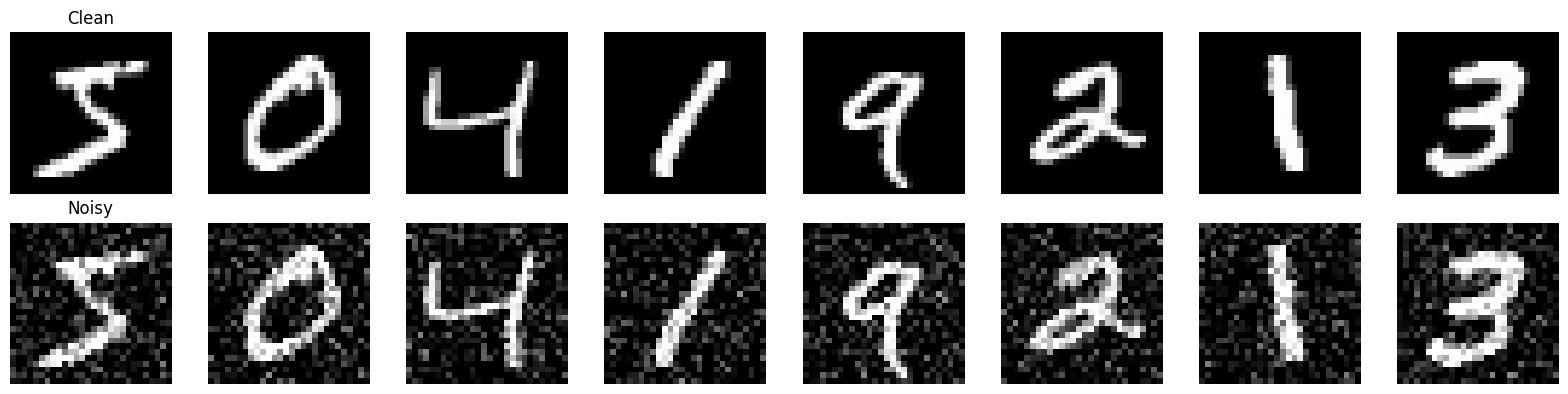

In [6]:
# Visualize clean vs noisy
def show_clean_noisy_examples(x_clean, x_noisy, n=8):
    plt.figure(figsize=(2*n, 4))
    for i in range(n):
        # Clean row
        plt.subplot(2, n, i+1)
        plt.imshow(x_clean[i].squeeze())
        plt.axis("off")
        if i == 0:
            plt.title("Clean")

        # Noisy row
        plt.subplot(2, n, n+i+1)
        plt.imshow(x_noisy[i].squeeze())
        plt.axis("off")
        if i == 0:
            plt.title("Noisy")
    plt.tight_layout()
    plt.show()

show_clean_noisy_examples(x_train_clean, x_train_noisy, n=8)


In [7]:
# build + compile the model + train
from models import build_residual_denoiser

model = build_residual_denoiser(
    input_shape=x_train_noisy.shape[1:],
    num_filters=32,
    num_layers=5,
    kernel_size=3
)
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse"
)

history = model.fit(
    x_train_noisy, x_train_clean,
    validation_data=(x_test_noisy, x_test_clean),
    epochs=10,
    batch_size=128,
    verbose=1
)


Model: "residual_denoiser"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │      9,248 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │      9,248 │ conv2d_1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28,    │      9,248 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28, 1) │        289 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 28, 28, 1) │          0 │ input_layer[0][0… │
│                     │                   │            │ conv2d_4[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - loss: 0.0060 - val_loss: 0.0027
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - loss: 0.0023 - val_loss: 0.0023


In [9]:
#One forward pass
y = model.predict(x_train_noisy[:4], verbose=0)
print("Output shape:", y.shape, "min/max:", y.min(), y.max())


Output shape: (4, 28, 28, 1) min/max: -0.03285828 1.0295315


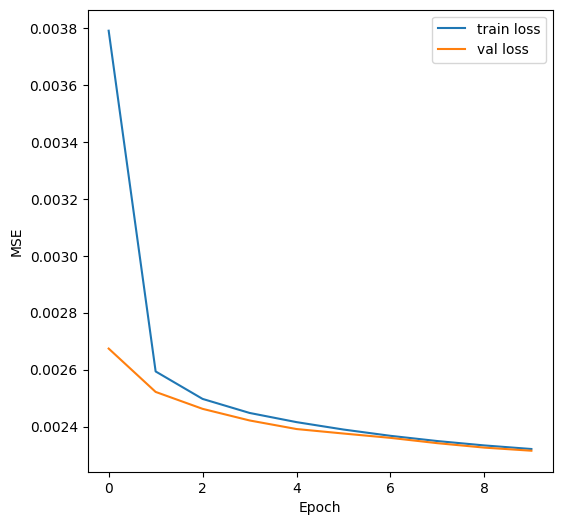

In [10]:
#Plot training curves
plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()


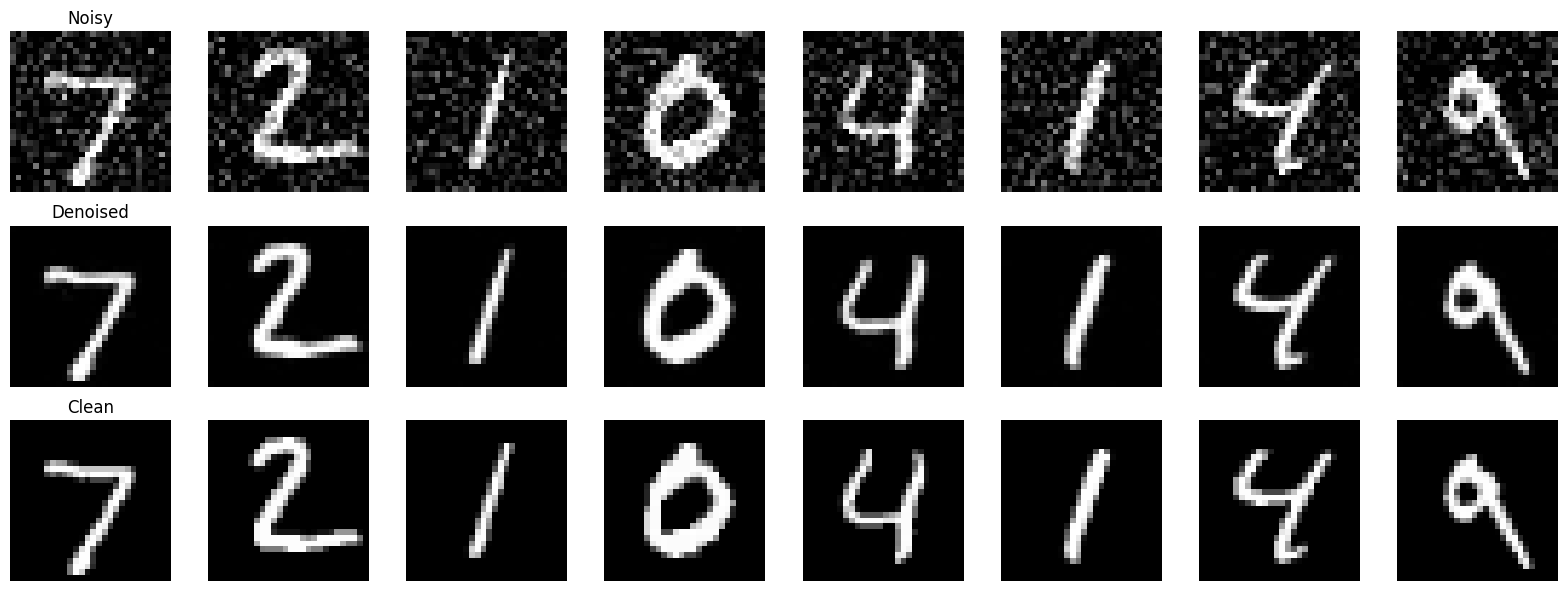

In [11]:
#Visualize denoising output
def show_denoising(model, x_noisy, x_clean, n=8):
    x_pred = model.predict(x_noisy[:n], verbose=0)
    x_pred = np.clip(x_pred, 0.0, 1.0)

    plt.figure(figsize=(2*n, 6))
    for i in range(n):
        plt.subplot(3, n, i+1)
        plt.imshow(x_noisy[i].squeeze()); plt.axis("off")
        if i == 0: plt.title("Noisy")

        plt.subplot(3, n, n+i+1)
        plt.imshow(x_pred[i].squeeze()); plt.axis("off")
        if i == 0: plt.title("Denoised")

        plt.subplot(3, n, 2*n+i+1)
        plt.imshow(x_clean[i].squeeze()); plt.axis("off")
        if i == 0: plt.title("Clean")

    plt.tight_layout()
    plt.show()

show_denoising(model, x_test_noisy, x_test_clean, n=8)

In [13]:
#run evaluation on the test set
from eval_utils import evaluate_denoiser

results = evaluate_denoiser(model, x_test_noisy, x_test_clean, clip_pred=True)

for k, v in results.items():
    print(f"{k:12s}: {v:.6f}" if "mse" in k else f"{k:12s}: {v:.2f} dB")

mse_noisy   : 0.021209
psnr_noisy  : 16.73 dB
mse_denoised: 0.002283
psnr_denoised: 26.41 dB


In [14]:
#save numbers
summary_row = {
    "sigma": sigma,
    "val_loss_last": float(history.history["val_loss"][-1]),
    **results
}
summary_row

{'sigma': 0.2,
 'val_loss_last': 0.0023149948101490736,
 'mse_noisy': 0.021208880469202995,
 'psnr_noisy': 16.73482255502549,
 'mse_denoised': 0.0022832315880805254,
 'psnr_denoised': 26.414500356150022}

In [15]:
#test different sigmas
from data_utils import make_noisy_pairs
from models import build_residual_denoiser
from eval_utils import evaluate_denoiser

sigmas = [0.1, 0.2, 0.3]
epochs = 10
batch_size = 128

all_results = []

for sigma in sigmas:
    print("\n" + "="*60)
    print(f"Training residual denoiser for sigma = {sigma}")
    print("="*60)

    # Re-generate noisy data for this sigma
    x_train_noisy, x_train_clean = make_noisy_pairs(x_train, sigma=sigma, seed=123)
    x_test_noisy,  x_test_clean  = make_noisy_pairs(x_test,  sigma=sigma, seed=456)

    # Build a fresh model
    model = build_residual_denoiser(
        input_shape=x_train_noisy.shape[1:],
        num_filters=32,
        num_layers=5,
        kernel_size=3
    )

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse"
    )

    history = model.fit(
        x_train_noisy, x_train_clean,
        validation_data=(x_test_noisy, x_test_clean),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0  # set to 1 if you want full logs
    )

    # Evaluate
    res = evaluate_denoiser(model, x_test_noisy, x_test_clean, clip_pred=True)
    row = {
        "sigma": sigma,
        "val_loss_last": float(history.history["val_loss"][-1]),
        **res
    }
    all_results.append(row)

    print(f"val_loss_last: {row['val_loss_last']:.6f}")
    print(f"mse_noisy    : {row['mse_noisy']:.6f}   psnr_noisy    : {row['psnr_noisy']:.2f} dB")
    print(f"mse_denoised : {row['mse_denoised']:.6f}   psnr_denoised : {row['psnr_denoised']:.2f} dB")


Training residual denoiser for sigma = 0.1
val_loss_last: 0.000822
mse_noisy    : 0.005433   psnr_noisy    : 22.65 dB
mse_denoised : 0.000810   psnr_denoised : 30.91 dB

Training residual denoiser for sigma = 0.2
val_loss_last: 0.002334
mse_noisy    : 0.021209   psnr_noisy    : 16.73 dB
mse_denoised : 0.002303   psnr_denoised : 26.38 dB

Training residual denoiser for sigma = 0.3
val_loss_last: 0.004327
mse_noisy    : 0.046626   psnr_noisy    : 13.31 dB
mse_denoised : 0.004283   psnr_denoised : 23.68 dB


In [16]:
import pandas as pd

df = pd.DataFrame(all_results)
df = df[["sigma", "val_loss_last", "mse_noisy", "psnr_noisy", "mse_denoised", "psnr_denoised"]]
df

,sigma,val_loss_last,mse_noisy,psnr_noisy,mse_denoised,psnr_denoised
0,0.1,0.000822,0.005433,22.649576,0.000810,30.914396
1,0.2,0.002334,0.021209,16.734823,0.002303,26.377246
2,0.3,0.004327,0.046626,13.313699,0.004283,23.682045


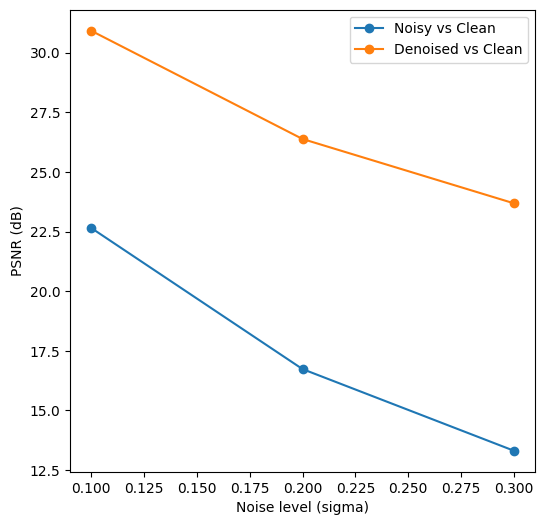

In [17]:
plt.figure()
plt.plot(df["sigma"], df["psnr_noisy"], marker="o", label="Noisy vs Clean")
plt.plot(df["sigma"], df["psnr_denoised"], marker="o", label="Denoised vs Clean")
plt.xlabel("Noise level (sigma)")
plt.ylabel("PSNR (dB)")
plt.legend()
plt.show()

In [18]:
from data_utils import make_noisy_pairs
from models import build_residual_denoiser
from eval_utils import evaluate_denoiser
import pandas as pd

sigma = 0.2
epochs = 10
batch_size = 128

# Fix dataset for fair comparison
x_train_noisy, x_train_clean = make_noisy_pairs(x_train, sigma=sigma, seed=123)
x_test_noisy,  x_test_clean  = make_noisy_pairs(x_test,  sigma=sigma, seed=456)

depths = [3, 5, 7]
depth_results = []

for num_layers in depths:
    print("\n" + "="*60)
    print(f"Training depth = {num_layers} (sigma={sigma})")
    print("="*60)

    model = build_residual_denoiser(
        input_shape=x_train_noisy.shape[1:],
        num_filters=32,      # keep constant
        num_layers=num_layers,
        kernel_size=3
    )

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse"
    )

    history = model.fit(
        x_train_noisy, x_train_clean,
        validation_data=(x_test_noisy, x_test_clean),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    res = evaluate_denoiser(model, x_test_noisy, x_test_clean, clip_pred=True)

    row = {
        "sigma": sigma,
        "num_layers": num_layers,
        "val_loss_last": float(history.history["val_loss"][-1]),
        **res
    }
    depth_results.append(row)

    print(f"val_loss_last: {row['val_loss_last']:.6f}")
    print(f"psnr_noisy    : {row['psnr_noisy']:.2f} dB")
    print(f"psnr_denoised : {row['psnr_denoised']:.2f} dB")



Training depth = 3 (sigma=0.2)
val_loss_last: 0.002495
psnr_noisy    : 16.73 dB
psnr_denoised : 26.06 dB

Training depth = 5 (sigma=0.2)
val_loss_last: 0.002334
psnr_noisy    : 16.73 dB
psnr_denoised : 26.38 dB

Training depth = 7 (sigma=0.2)
val_loss_last: 0.002270
psnr_noisy    : 16.73 dB
psnr_denoised : 26.50 dB


In [19]:
df_depth = pd.DataFrame(depth_results)
df_depth = df_depth[["sigma", "num_layers", "val_loss_last", "mse_denoised", "psnr_denoised"]]
df_depth

,sigma,num_layers,val_loss_last,mse_denoised,psnr_denoised
0,0.2,3,0.002495,0.002475,26.063909
1,0.2,5,0.002334,0.002301,26.381604
2,0.2,7,0.002270,0.002237,26.502466


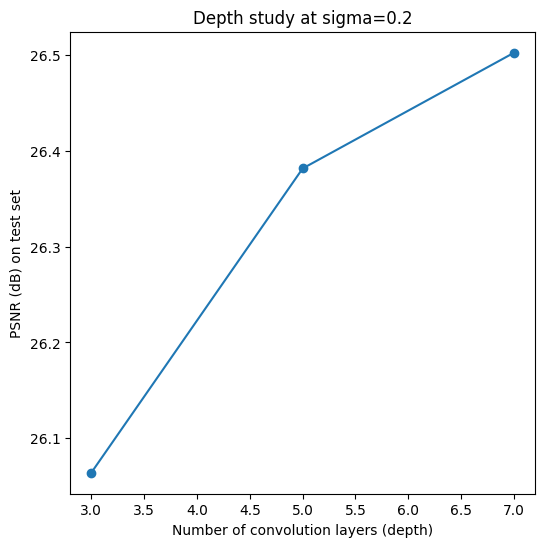

In [20]:
plt.figure()
plt.plot(df_depth["num_layers"], df_depth["psnr_denoised"], marker="o")
plt.xlabel("Number of convolution layers (depth)")
plt.ylabel("PSNR (dB) on test set")
plt.title(f"Depth study at sigma={sigma}")
plt.show()